# Heart Attack Prediction



In [2]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install pandas

In [2]:
pip install sklearn

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/sklearn-

In [1]:
import seaborn as sns;
import warnings
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import plotly.express as px
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,roc_curve, roc_auc_score



In [2]:
import pandas as pd # Import the pandas library

data= pd.read_csv("HeartDataset.csv") # Now you can use pd.read_csv
data.head(100)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
95,58,M,ASY,130,263,0,Normal,140,Y,2.0,Flat,1
96,43,M,ATA,142,207,0,Normal,138,N,0.0,Up,0
97,39,M,NAP,160,147,1,Normal,160,N,0.0,Up,0
98,56,M,ASY,120,85,0,Normal,140,N,0.0,Up,0


In [3]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


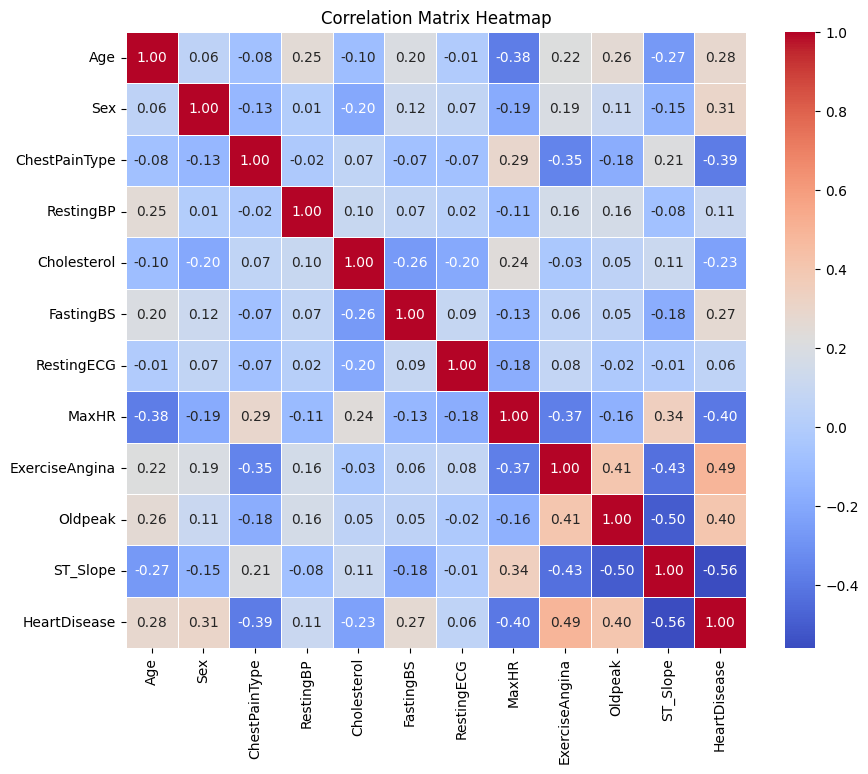

In [4]:
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder # Make sure LabelEncoder is imported
import plotly.express as px
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,roc_curve, roc_auc_score

df = data.copy()
lbl=LabelEncoder()
categorical_columns = ['Sex', 'ChestPainType', 'RestingECG','ExerciseAngina','ST_Slope']
for col in categorical_columns:
    df[col] = lbl.fit_transform(df[col])

corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

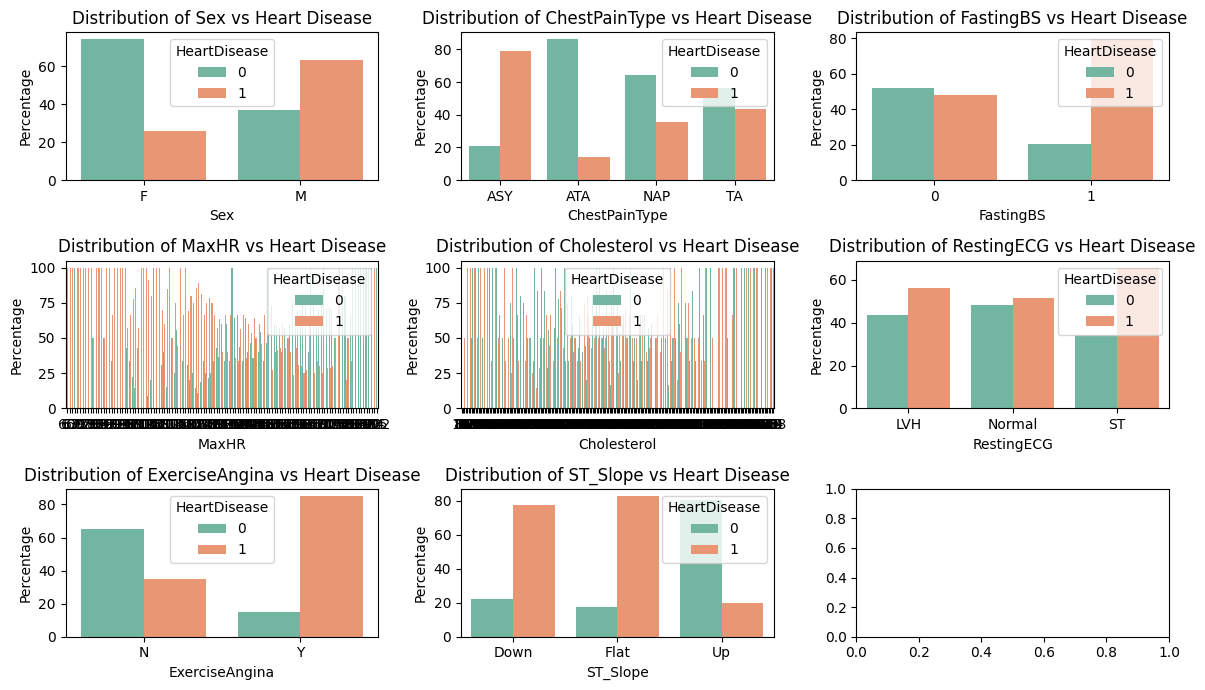

In [5]:
fig, axes = plt.subplots(3, 3, figsize=(12, 7)) # Changed from (2, 3) to (3, 3)
categorical_features = ['Sex', 'ChestPainType', "FastingBS","MaxHR","Cholesterol",'RestingECG', 'ExerciseAngina', 'ST_Slope']
for i, feature in enumerate(categorical_features):
    row = i // 3  # Now correctly calculates the row index for a 3x3 grid
    col = i % 3   # Now correctly calculates the column index for a 3x3 grid
    count_data = data.groupby([feature, 'HeartDisease']).size().reset_index(name='Count')
    total_counts = count_data.groupby(feature)['Count'].transform('sum')
    count_data['Percentage'] = count_data['Count'] / total_counts * 100
    sns.barplot(x=feature, y='Percentage', hue='HeartDisease', data=count_data, ax=axes[row, col], palette="Set2") # The ax parameter now uses the correct indices
    axes[row, col].set_title(f"Distribution of {feature} vs Heart Disease")
    axes[row, col].set_xlabel(feature)
    axes[row, col].set_ylabel("Percentage")

plt.tight_layout()
plt.show()

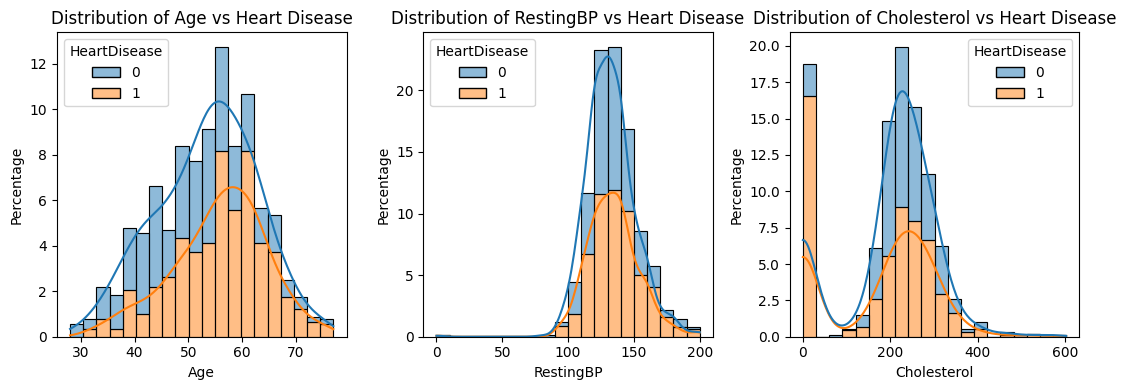

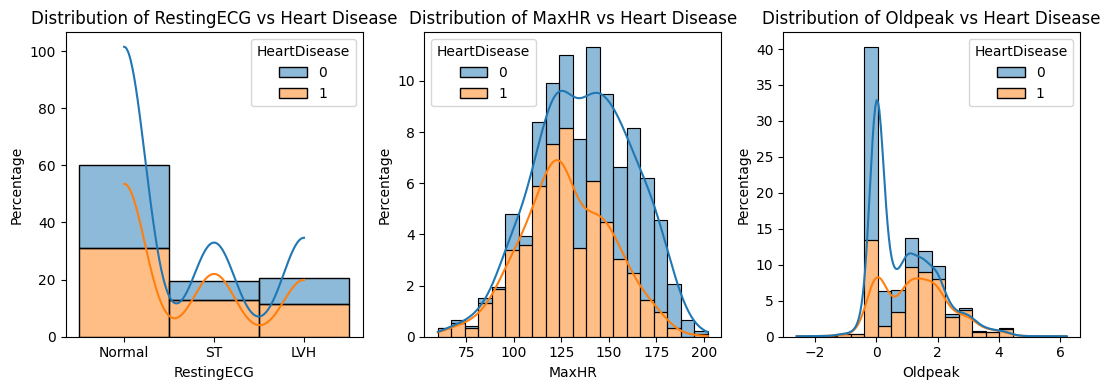

In [6]:
fig1, axes1 = plt.subplots(1, 3, figsize=(11, 4))
fig2, axes2 = plt.subplots(1, 3, figsize=(11, 4)) # Changed to 1 row, 3 columns to accommodate all numerical features
numerical_features = ['Age', 'RestingBP', 'Cholesterol','RestingECG','MaxHR', 'Oldpeak']

for i, feature in enumerate(numerical_features[:3]):
    sns.histplot(data=data, x=feature, hue="HeartDisease", multiple="stack", stat="percent", ax=axes1[i], kde=True, bins=20)
    axes1[i].set_title(f"Distribution of {feature} vs Heart Disease")
    axes1[i].set_xlabel(feature)
    axes1[i].set_ylabel("Percentage")

for i, feature in enumerate(numerical_features[3:]):
    sns.histplot(data=data, x=feature, hue="HeartDisease", multiple="stack", stat="percent", ax=axes2[i], kde=True, bins=20) # Now, 'i' will be 0, 1, 2 which are valid indices for axes2
    axes2[i].set_title(f"Distribution of {feature} vs Heart Disease")
    axes2[i].set_xlabel(feature)
    axes2[i].set_ylabel("Percentage")

fig1.tight_layout()
fig2.tight_layout()

plt.show()

In [8]:
X = df.drop(columns=['HeartDisease'])
y = df['HeartDisease']

test_size = 200
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

In [9]:
print( "Features precedence for Random Forest model :")
print("="*46)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

importances_rf = rf_model.feature_importances_
rf_feature_importances = pd.Series(importances_rf, index=X.columns).sort_values(ascending=False)
print( "  features    |  significance ")
print("-"*30)
print(rf_feature_importances)

Features precedence for Random Forest model :
  features    |  significance 
------------------------------
ST_Slope          0.228676
Oldpeak           0.119737
MaxHR             0.110136
Cholesterol       0.109451
ExerciseAngina    0.098938
ChestPainType     0.097088
Age               0.086828
RestingBP         0.070146
Sex               0.032772
RestingECG        0.025085
FastingBS         0.021141
dtype: float64


In [10]:
print( "Features precedence for XGBoost Model :")
print("="*40)
xgb_model = xgb.XGBClassifier(n_estimators=200, random_state=42)
xgb_model.fit(X_train, y_train)

importances_xgb = xgb_model.feature_importances_
xgb_feature_importances = pd.Series(importances_xgb, index=X.columns).sort_values(ascending=False)

print( "  features    |  significance ")
print("-"*30)
print(xgb_feature_importances)

Features precedence for XGBoost Model :
  features    |  significance 
------------------------------
ST_Slope          0.525106
ChestPainType     0.089140
ExerciseAngina    0.083341
Sex               0.077442
FastingBS         0.056473
Oldpeak           0.040961
RestingECG        0.029506
RestingBP         0.027428
Cholesterol       0.027099
MaxHR             0.021776
Age               0.021730
dtype: float32


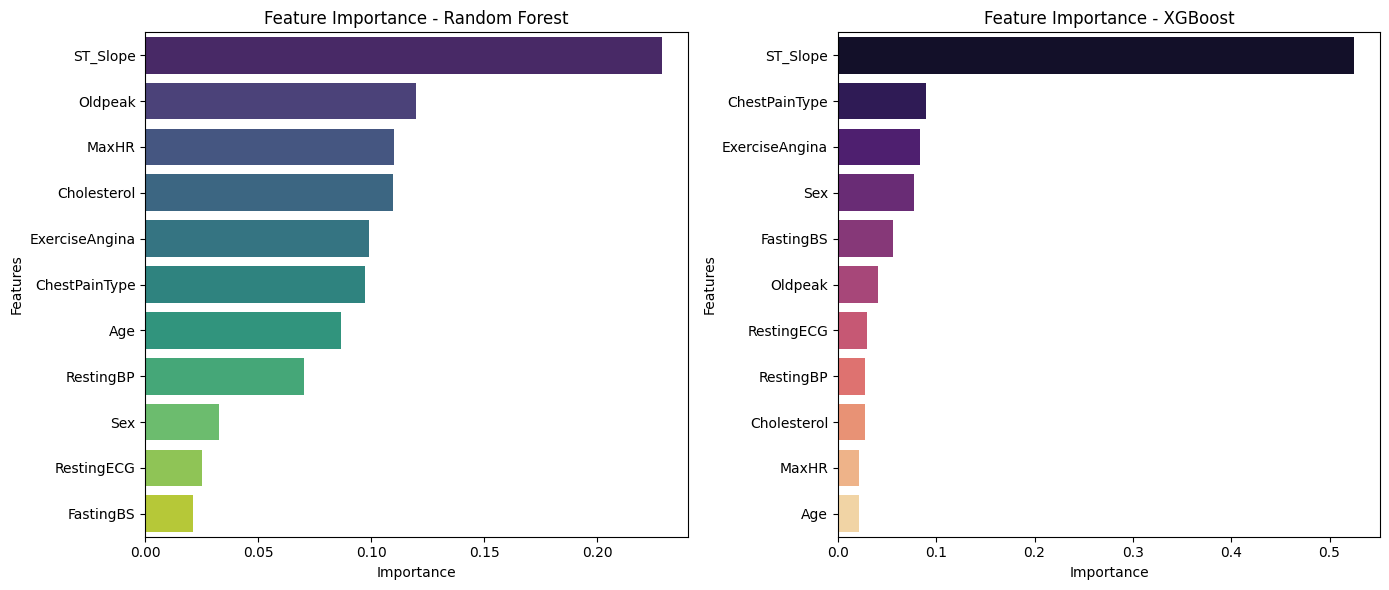

In [11]:
warnings.filterwarnings('ignore', category=FutureWarning)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.barplot(x=rf_feature_importances.values, y=rf_feature_importances.index, hue= None, palette='viridis')
plt.title("Feature Importance - Random Forest")
plt.xlabel("Importance")
plt.ylabel("Features")

plt.subplot(1, 2, 2)
sns.barplot(x=xgb_feature_importances.values, y=xgb_feature_importances.index, hue=None,palette='magma',legend=False)
plt.title("Feature Importance - XGBoost")
plt.xlabel("Importance")
plt.ylabel("Features")

plt.tight_layout()
plt.show()
warnings.filterwarnings('ignore', category=FutureWarning)


In [12]:
models = {'Random Forest': rf_model, 'XGBoost': xgb_model}
results = {}

for model_name, model in models.items():
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    conf_matrix = confusion_matrix(y_test, y_pred)

    results[model_name] = {
        'Accuracy': accuracy,
        'Classification Report': report,
        'Confusion Matrix': conf_matrix
    }

In [13]:
for model_name, result in results.items():
    print(f"Model: {model_name}")
    print("-"*60)
    print(f"Accuracy: {result['Accuracy']:.4f}")
    print("Classification Report:")
    print(pd.DataFrame(result['Classification Report']).T)
    print("Confusion Matrix:")
    print(result['Confusion Matrix'],"\n")

Model: Random Forest
------------------------------------------------------------
Accuracy: 0.9000
Classification Report:
              precision    recall  f1-score  support
0              0.863636  0.904762  0.883721     84.0
1              0.928571  0.896552  0.912281    116.0
accuracy       0.900000  0.900000  0.900000      0.9
macro avg      0.896104  0.900657  0.898001    200.0
weighted avg   0.901299  0.900000  0.900286    200.0
Confusion Matrix:
[[ 76   8]
 [ 12 104]] 

Model: XGBoost
------------------------------------------------------------
Accuracy: 0.8650
Classification Report:
              precision    recall  f1-score  support
0              0.806452  0.892857  0.847458   84.000
1              0.915888  0.844828  0.878924  116.000
accuracy       0.865000  0.865000  0.865000    0.865
macro avg      0.861170  0.868842  0.863191  200.000
weighted avg   0.869925  0.865000  0.865708  200.000
Confusion Matrix:
[[75  9]
 [18 98]] 



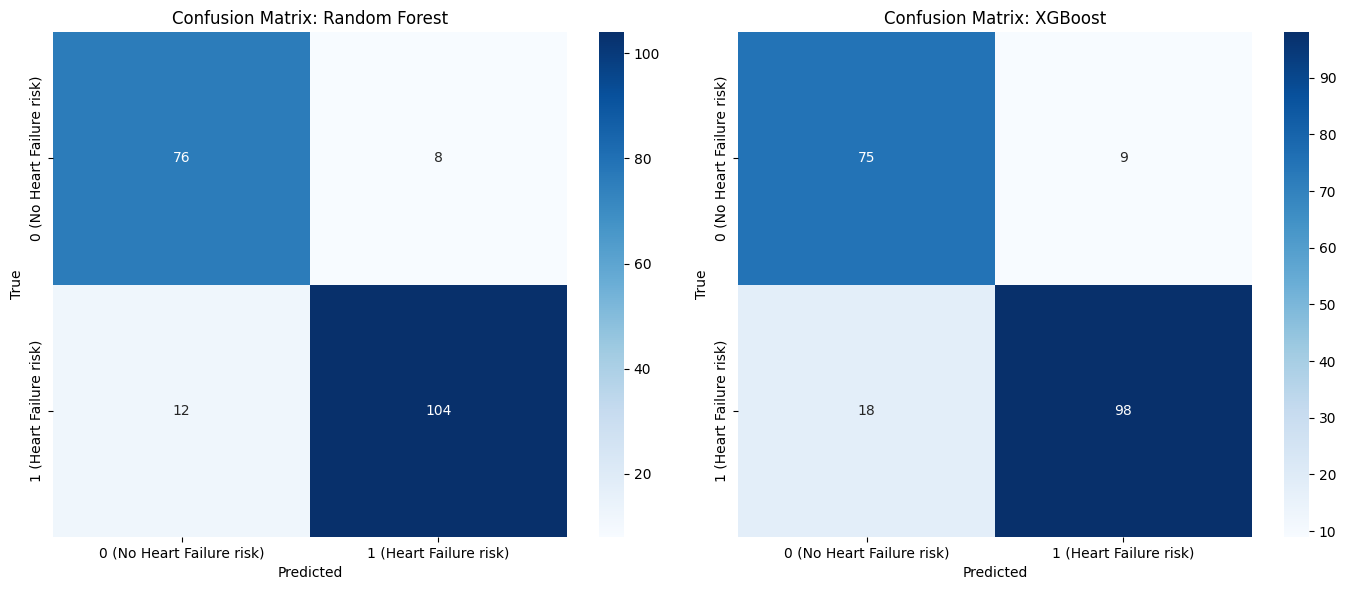

In [14]:
plt.figure(figsize=(14, 6))

for i, (model_name, result) in enumerate(results.items()):
    plt.subplot(1, 2, i+1)
    conf_matrix = result['Confusion Matrix']
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['0 (No Heart Failure risk)', '1 (Heart Failure risk)'],
                yticklabels=['0 (No Heart Failure risk)', '1 (Heart Failure risk)'])
    plt.title(f'Confusion Matrix: {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')

plt.tight_layout()
plt.show()

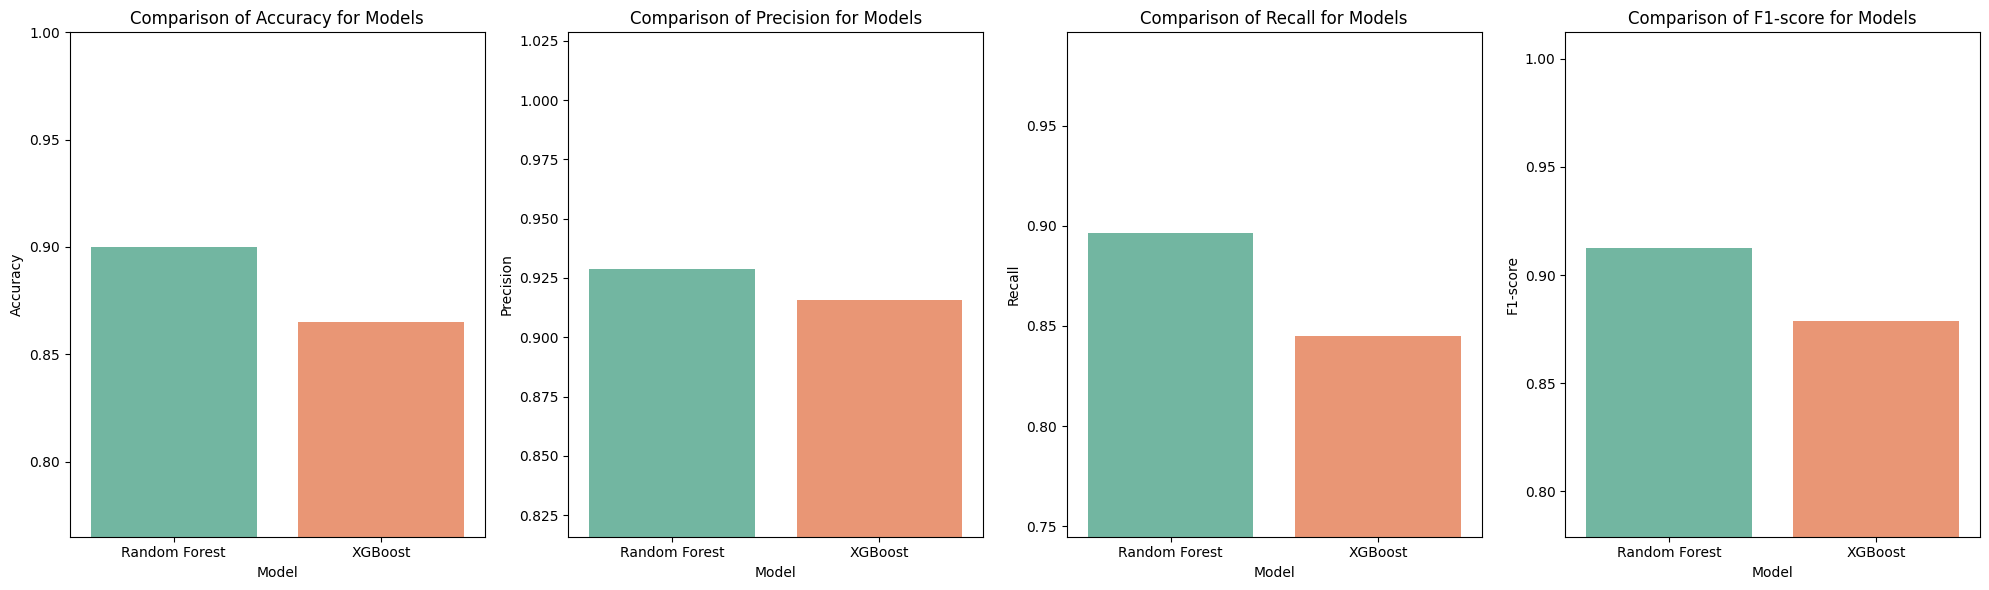

In [15]:
metrics = ['Accuracy', 'precision', 'recall', 'f1-score']
fig, axes = plt.subplots(1, 4, figsize=(20, 6))
warnings.filterwarnings('ignore', category=FutureWarning)

for i, metric in enumerate(metrics):
    metric_values = {}

    for model_name, result in results.items():
        if metric == 'Accuracy':
            metric_values[model_name] = result['Accuracy']
        else:
            metric_values[model_name] = result['Classification Report']['1'][metric]
    sns.barplot(x=list(metric_values.keys()), y=list(metric_values.values()), palette='Set2', ax=axes[i])
    axes[i].set_title(f'Comparison of {metric.capitalize()} for Models')
    axes[i].set_ylabel(f'{metric.capitalize()}')
    axes[i].set_xlabel('Model')

    axes[i].set_ylim(min(metric_values.values()) - 0.1, max(metric_values.values()) + 0.1)
plt.tight_layout()
plt.show()


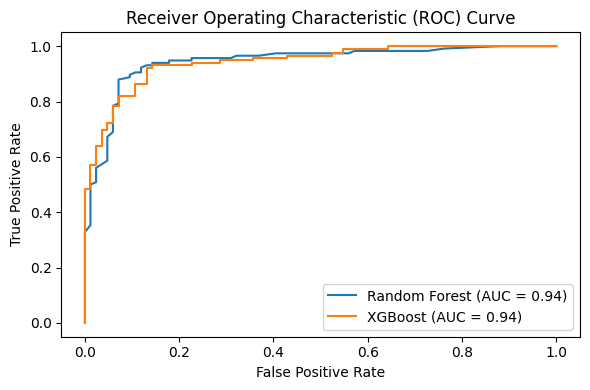

In [16]:

plt.figure(figsize=(6, 4))

for model_name, model in models.items():
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    auc = roc_auc_score(y_test, y_pred_prob)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc:.2f})')

plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')

plt.tight_layout()
plt.show()


In [17]:
pip install streamlit pandas numpy scikit-learn



   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   --- ------------------------------------ 0.8/9.6 MB 4.2 MB/s eta 0:00:03
   ------- -------------------------------- 1.8/9.6 MB 4.6 MB/s eta 0:00:02
   ---------- ----------------------------- 2.6/9.6 MB 4.4 MB/s eta 0:00:02
   -------------- ------------------------- 3.4/9.6 MB 4.3 MB/s eta 0:00:02
   ----------------- ---------------------- 4.2/9.6 MB 4.0 MB/s eta 0:00:02
   ------------------- -------------------- 4.7/9.6 MB 3.9 MB/s eta 0:00:02
   ----------------------- ---------------- 5.5/9.6 MB 3.8 MB/s eta 0:00:02
   -------------------------- ------------- 6.3/9.6 MB 3.7 MB/s eta 0:00:01
   ----------------------------- ---------- 7.1/9.6 MB 3.7 MB/s eta 0:00:01
   -------------------------------- ------- 7.9/9.6 MB 3.6 MB/s eta 0:00:01
   ----------------------------------- ---- 8.4/9.6 MB 3.6 MB/s eta 0:00:01
   ------------------------------------- -- 8.9/9.6 MB 3.5 MB/s eta 0:00:01
   ---------------

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
mysql-connector-python 8.0.33 requires protobuf<=3.20.3,>=3.11.0, but you have protobuf 5.29.3 which is incompatible.



   ------------------------- -------------- 4.5/6.9 MB 4.1 MB/s eta 0:00:01
   ------------------------------ --------- 5.2/6.9 MB 4.0 MB/s eta 0:00:01
   ---------------------------------- ----- 6.0/6.9 MB 4.0 MB/s eta 0:00:01
   ---------------------------------------  6.8/6.9 MB 3.9 MB/s eta 0:00:01
   ---------------------------------------  6.8/6.9 MB 3.9 MB/s eta 0:00:01
   ---------------------------------------- 6.9/6.9 MB 3.3 MB/s eta 0:00:00
